In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/content/Algerian_forest_fire_Cleaned.csv")

In [4]:
df_copy = df.drop(["day", "month", "year"], axis=1)

df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df_copy.Classes.value_counts() ## Categories in classes

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [6]:
df_copy['Classes'] = np.where(df_copy["Classes"].str.contains("not fire"), 0,1)

In [7]:
df_copy.Classes.value_counts()

,count
Classes,
1,137
0,106


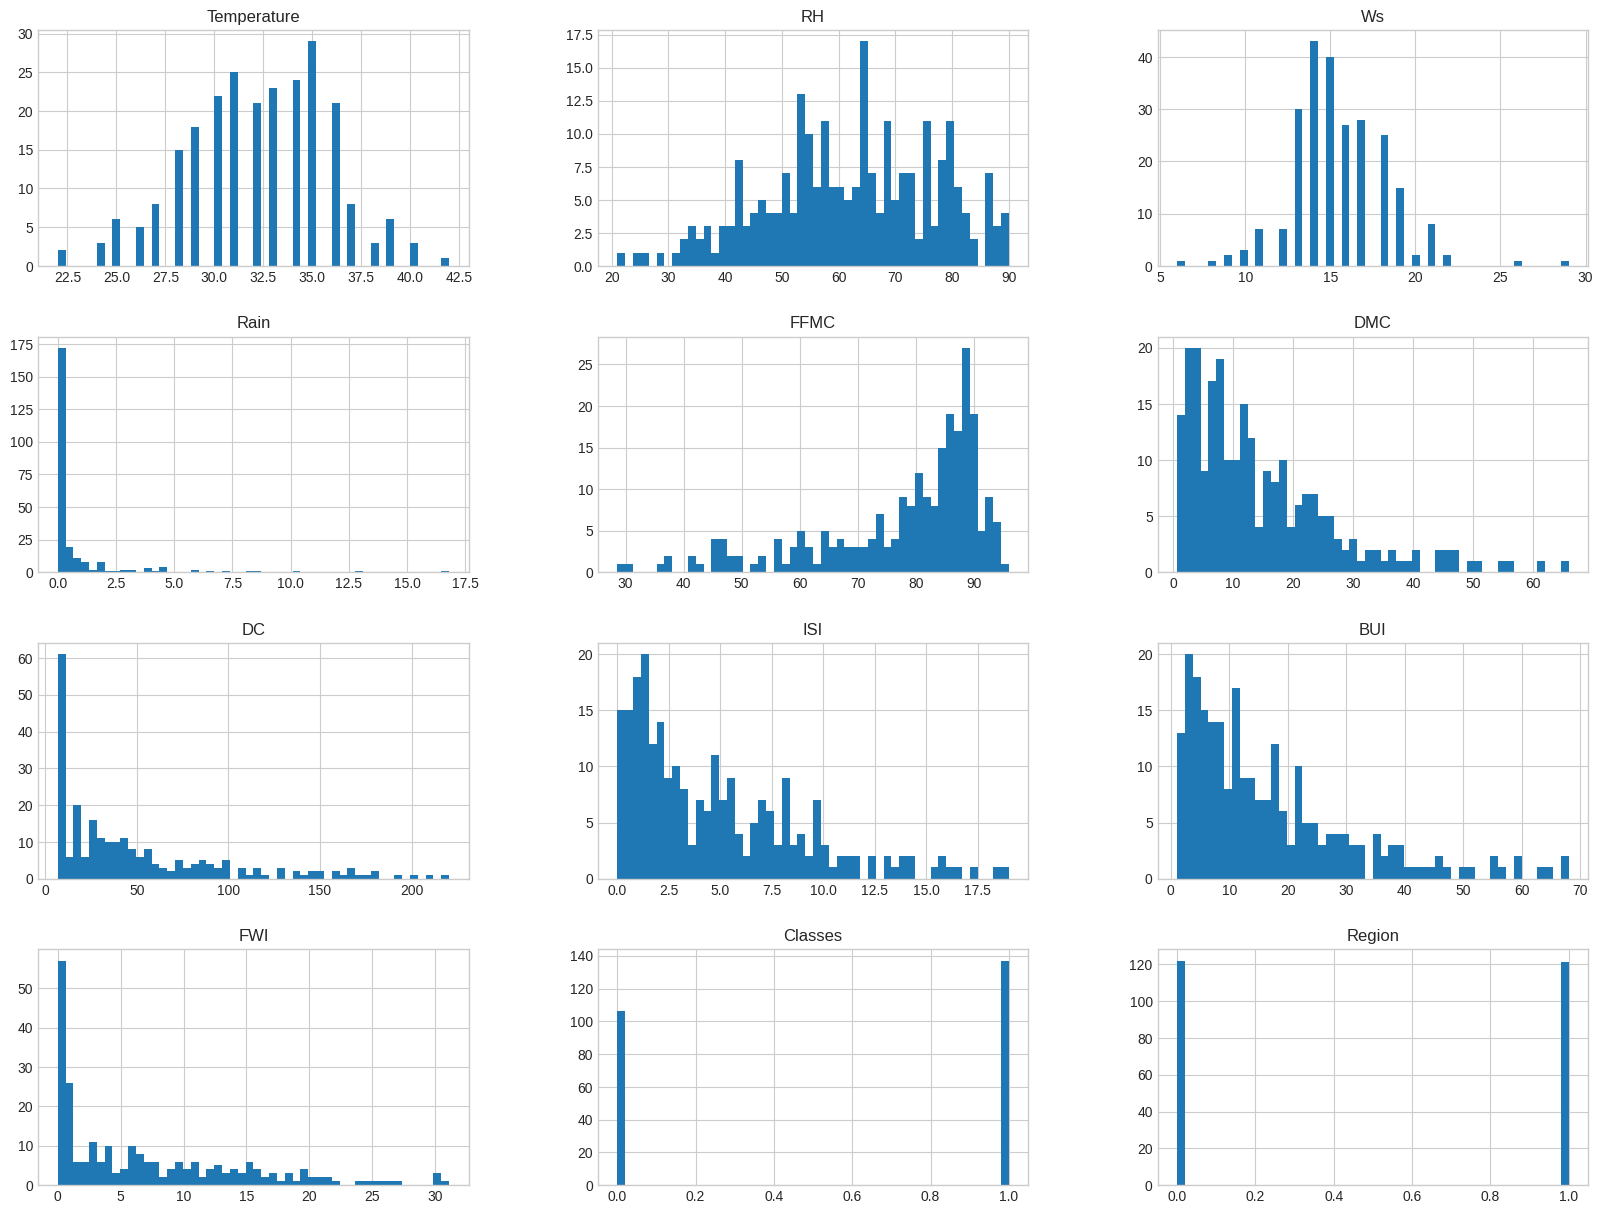

In [8]:
# Plot the classes
plt.style.use("seaborn-v0_8-whitegrid")
df_copy.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
percentage = df_copy.Classes.value_counts(normalize=True) * 100


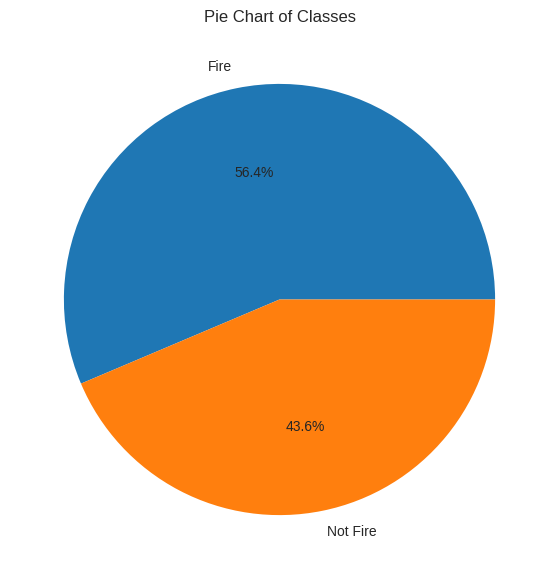

In [10]:
classlabels = ["Fire", "Not Fire"]
plt.figure(figsize=(12, 7))
plt.pie(percentage, labels=classlabels, autopct="%1.1f%%")
plt.title("Pie Chart of Classes")
plt.show()

In [11]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

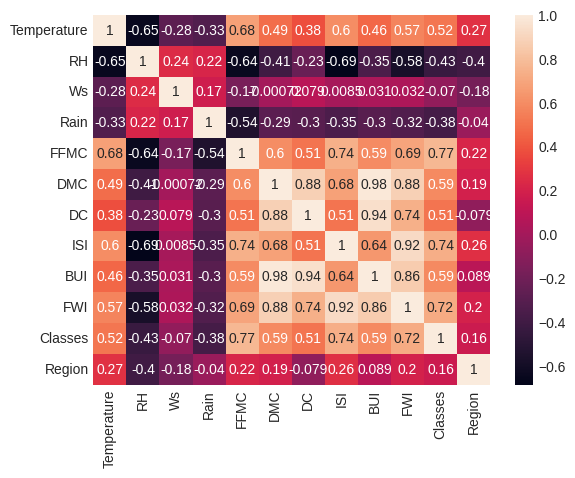

In [14]:
sns.heatmap(df_copy.corr(), annot=True)

<Axes: ylabel='FWI'>

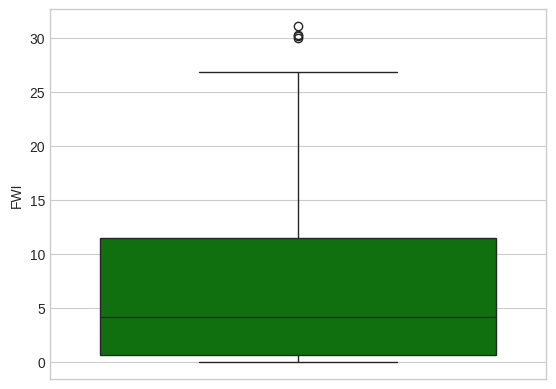

In [15]:
## Box plot
sns.boxplot(df_copy["FWI"], color="green")

In [16]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Regionds')

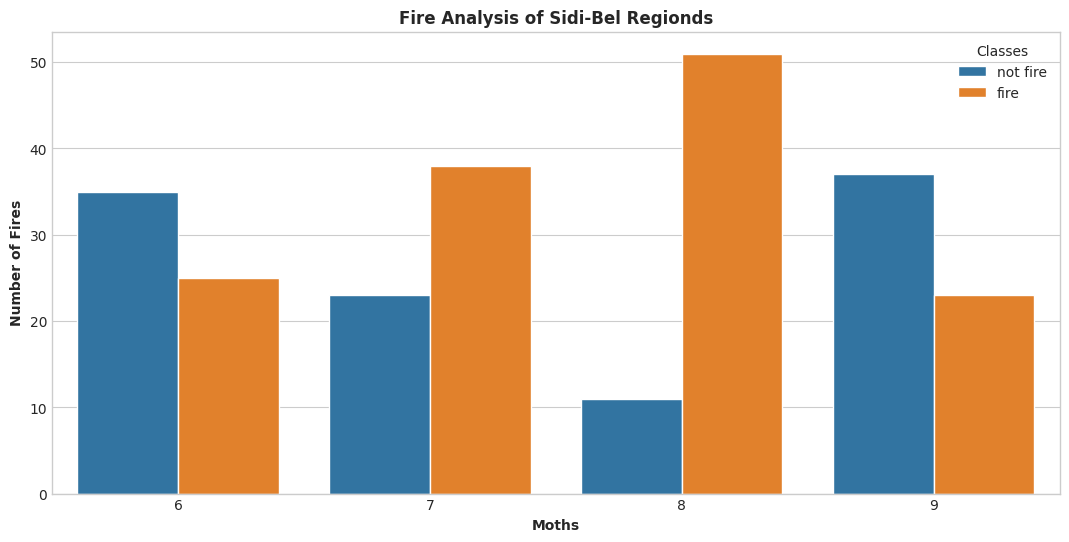

In [17]:
## Fire Analysis

df["Classes"] = np.where(df["Classes"].str.contains("not fire"), "not fire", "fire")


# monthly fire Analysis for region 1
dftemp = df.loc[df["Region"]==1]
plt.subplots(figsize=(13, 6))
sns.set_style("whitegrid")
sns.countplot(x="month", hue="Classes", data=df)
plt.ylabel("Number of Fires", weight="bold")
plt.xlabel("Moths", weight="bold")
plt.title("Fire Analysis of Sidi-Bel Regionds", weight="bold")

Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Regionds')

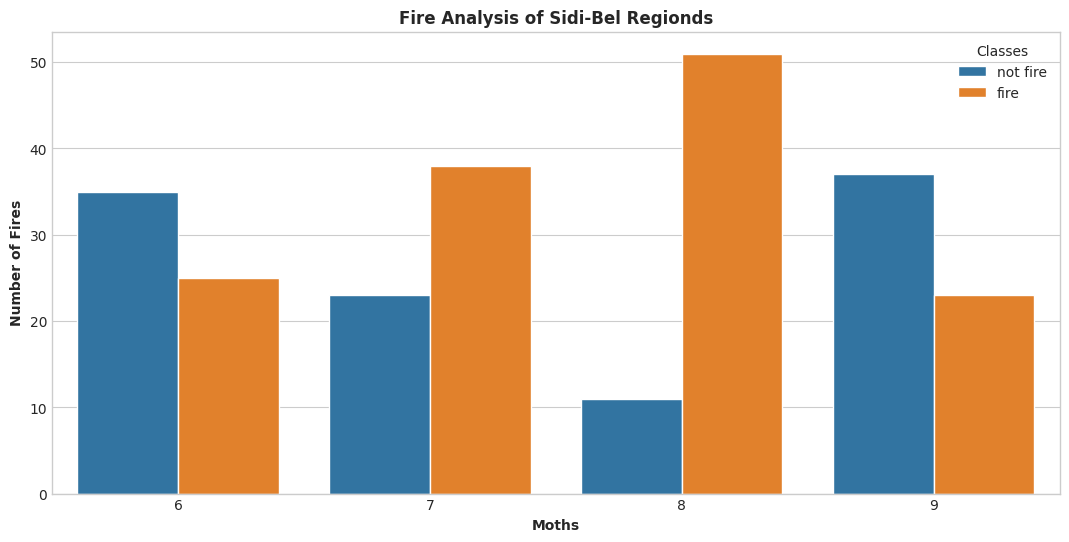

In [18]:
 #monthly fire Analysis for region 1
dftemp = df.loc[df["Region"]==0]
plt.subplots(figsize=(13, 6))
sns.set_style("whitegrid")
sns.countplot(x="month", hue="Classes", data=df)
plt.ylabel("Number of Fires", weight="bold")
plt.xlabel("Moths", weight="bold")
plt.title("Fire Analysis of Sidi-Bel Regionds", weight="bold")